In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [15]:
# Load dataset
generation_data = pd.read_csv("Plant_1_Generation_Data.csv")

In [16]:
# Convert DATE_TIME to datetime format
generation_data["DATE_TIME"] = pd.to_datetime(generation_data["DATE_TIME"], dayfirst=True, errors='coerce')

In [17]:
# Feature Engineering
generation_data["Hour"] = generation_data["DATE_TIME"].dt.hour
generation_data["Day"] = generation_data["DATE_TIME"].dt.day
generation_data["Month"] = generation_data["DATE_TIME"].dt.month

In [18]:
# Drop missing values
generation_data.dropna(inplace=True)

In [19]:
# Define failure (assume efficiency below 0.85 is a failure)
generation_data["Efficiency"] = generation_data["AC_POWER"] / generation_data["DC_POWER"]
generation_data["Failure"] = (generation_data["Efficiency"] < 0.85).astype(int)


In [20]:
# Features and Target
features = ["DC_POWER", "AC_POWER", "DAILY_YIELD", "TOTAL_YIELD", "Hour", "Day", "Month"]
target = "Failure"

In [21]:
# Split dataset
X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(generation_data[features], generation_data[target], generation_data["SOURCE_KEY"], test_size=0.2, random_state=42)

In [22]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
# Evaluation
accuracy = accuracy_score(y_test, rf_predictions)
print(f"Inverter Failure Detection Accuracy: {accuracy:.2f}")
print(classification_report(y_test, rf_predictions))

Inverter Failure Detection Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6444
           1       1.00      1.00      1.00      7312

    accuracy                           1.00     13756
   macro avg       1.00      1.00      1.00     13756
weighted avg       1.00      1.00      1.00     13756



In [11]:
# Evaluation
accuracy = accuracy_score(y_test, rf_predictions)
print(f"Inverter Failure Detection Accuracy: {accuracy:.2f}")
print(classification_report(y_test, rf_predictions))

Inverter Failure Detection Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6444
           1       1.00      1.00      1.00      7312

    accuracy                           1.00     13756
   macro avg       1.00      1.00      1.00     13756
weighted avg       1.00      1.00      1.00     13756



In [25]:
# Identify failed inverters
failed_inverters = id_test[rf_predictions == 1]
print("\n🔴 Failed Inverters (IDs):")
print(failed_inverters.unique())


🔴 Failed Inverters (IDs):
['sjndEbLyjtCKgGv' 'z9Y9gH1T5YWrNuG' '1BY6WEcLGh8j5v7' 'zVJPv84UY57bAof'
 'adLQvlD726eNBSB' '3PZuoBAID5Wc2HD' 'bvBOhCH3iADSZry' 'pkci93gMrogZuBj'
 'uHbuxQJl8lW7ozc' 'rGa61gmuvPhdLxV' 'zBIq5rxdHJRwDNY' 'WRmjgnKYAwPKWDb'
 'ZoEaEvLYb1n2sOq' 'wCURE6d3bPkepu2' 'VHMLBKoKgIrUVDU' '1IF53ai7Xc0U56Y'
 'McdE0feGgRqW7Ca' '7JYdWkrLSPkdwr4' 'YxYtjZvoooNbGkE' 'ih0vzX44oOqAx2f'
 'ZnxXDlPa8U1GXgE' 'iCRJl6heRkivqQ3']


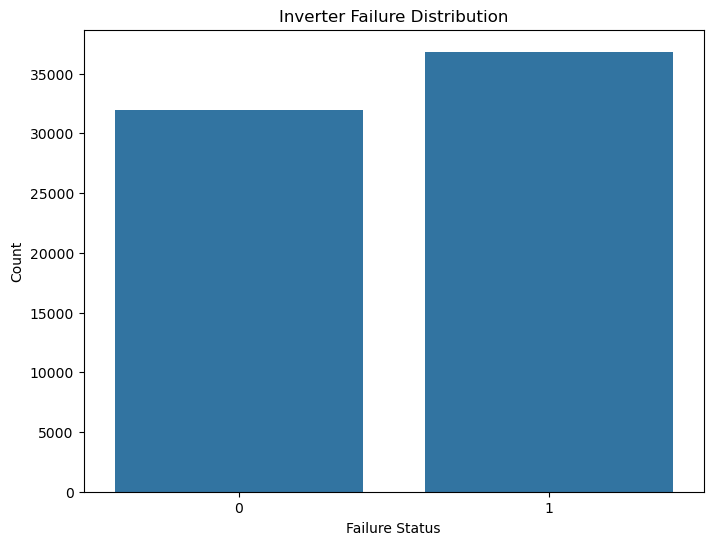

In [26]:
# Visualizing Inverter Failures
plt.figure(figsize=(8, 6))
sns.countplot(x=generation_data["Failure"])
plt.xlabel("Failure Status")
plt.ylabel("Count")
plt.title("Inverter Failure Distribution")
plt.show()

C:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


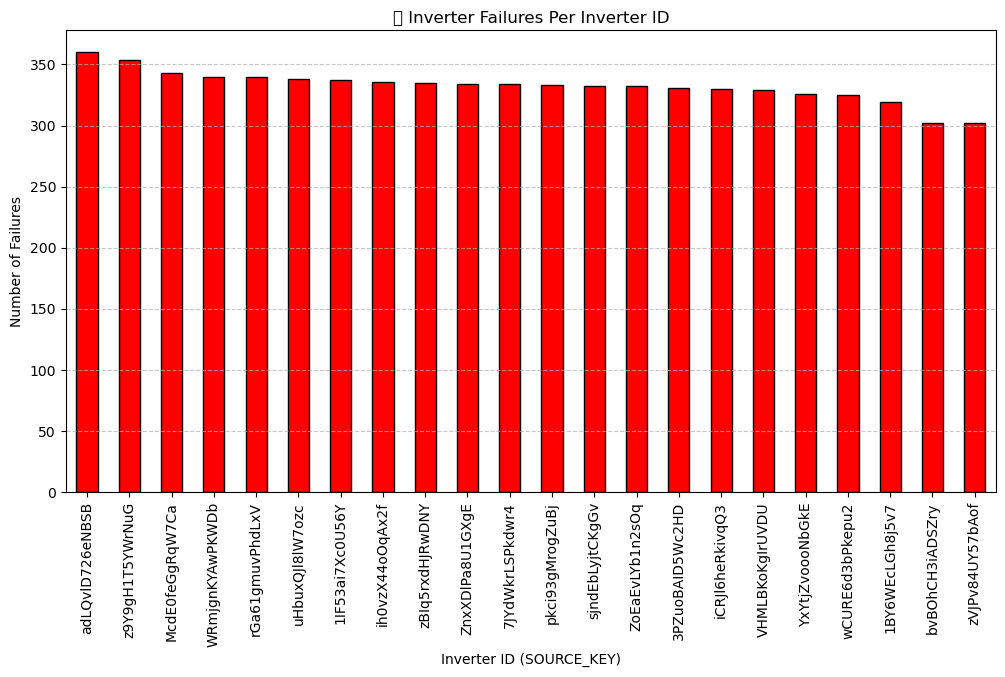

In [28]:
# Count failures per inverter ID
failed_inverter_counts = failed_inverters.value_counts()

# Plot bar graph
plt.figure(figsize=(12, 6))
failed_inverter_counts.plot(kind="bar", color="red", edgecolor="black")
plt.xlabel("Inverter ID (SOURCE_KEY)")
plt.ylabel("Number of Failures")
plt.title("🔴 Inverter Failures Per Inverter ID")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()